In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

**Data collection and Analysis**

In [97]:
#Loading dataset
df = pd.read_csv('diabetes.csv')

In [98]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [99]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [100]:
#num of rows and cols
df.shape

(768, 9)

In [101]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [102]:
df['Outcome'].value_counts()
#0 - non-diabetic
#1 - diabetic

Outcome
0    500
1    268
Name: count, dtype: int64

In [103]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [104]:
#Separate data and labels 

X = df.drop(columns='Outcome', axis = 1)
Y = df['Outcome']

**Data Standardization**

In [105]:
scaler = StandardScaler()

In [106]:
scaler.fit(X)

StandardScaler()

In [107]:
standardized_data = scaler.transform(X)

print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [108]:
X = standardized_data
Y = df['Outcome'] #already done, just for reminding

**Split Data**

In [109]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y ,test_size=0.2, random_state=2, stratify=Y, shuffle=True)

In [110]:
print(X.shape, Xtrain.shape, Xtest.shape)

(768, 8) (614, 8) (154, 8)


**TRAINING MODEL**

In [111]:
classifier = svm.SVC(kernel='linear', probability=True)

In [112]:
#Training SVM classifier
classifier.fit(Xtrain, Ytrain)


SVC(kernel='linear', probability=True)

**Model Evaluation**

In [113]:
#Accuracy score
YtrainPred = classifier.predict(Xtrain)
training_data_accuracy = accuracy_score(Ytrain, YtrainPred)
print(f'Accuracy score of training data is: {training_data_accuracy * 100:.3f}%')

Accuracy score of training data is: 78.664%


In [114]:
YtestPred = classifier.predict(Xtest)
testing_data_accuracy = accuracy_score(Ytest, YtestPred)
print(f'Accuracy score of testing data is: {testing_data_accuracy * 100:.3f}%')

Accuracy score of testing data is: 77.273%


**Making a Predictive System**

In [115]:
input_data = (2,197,70,45,543,30.5,0.158,53) #1

#transform input_data to numpy array

input_data_np = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_np.reshape(1, -1)

#standarize input data
std_data_input = scaler.transform(input_data_reshaped)
#print(std_data_input)

prediction = classifier.predict(std_data_input)

if(prediction[0] == 1):
    print('The patient is diabetic')
elif(prediction[0] == 0):
    print('The patient is non-diabetic')


The patient is diabetic


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [116]:
import numpy as np
import pandas as pd

# Patient input data (example): each value corresponds to a medical feature
input_data = (2, 197, 70, 45, 543, 30.5, 0.158, 53)  # 1 - diabetic

# Feature names used during model training and scaling
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Convert the input tuple into a DataFrame with matching column names
input_df = pd.DataFrame([input_data], columns=columns)

# Standardize the input using the same scaler used during training
std_data_input = scaler.transform(input_df)

# Make a prediction using the trained classifier
prediction = classifier.predict(std_data_input)

# Output the result based on the prediction
if prediction[0] == 1:
    print('The patient is diabetic')
else:
    print('The patient is non-diabetic')


The patient is diabetic


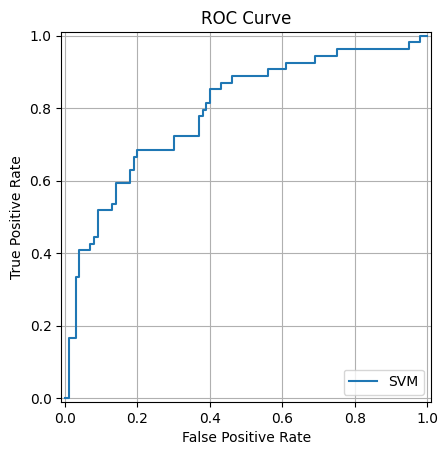

In [117]:
from sklearn.metrics import roc_curve, RocCurveDisplay

y_scores = classifier.predict_proba(Xtest)[:, 1]
fpr, tpr, _ = roc_curve(Ytest, y_scores)
RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name='SVM').plot()
plt.title('ROC Curve')
plt.show()
